In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
import os
path = './Sales_Data'
files = [file for file in os.listdir(path)]
print(files)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [4]:
all_months = pd.DataFrame()

In [5]:
for f in files:
    df = pd.read_csv('./Sales_Data/'+ f)
    all_months = pd.concat([all_months,df])

In [6]:
all_months.to_csv("Sales_Data.csv",index=False)

In [7]:
data_frame = pd.read_csv('./Sales_Data.csv')
data_frame.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [9]:
nan_df=data_frame[data_frame.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data_frame.dropna(how='all',inplace=True)

In [11]:
data_frame = data_frame[data_frame['Order Date'].str[0:2] !='Or']

In [12]:
data_frame['Months'] = data_frame['Order Date'].str[0:2]
data_frame['Months'] = data_frame['Months'].astype('int32')
data_frame.tail(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
186840,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001",9
186841,259350,Google Phone,1,600,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9
186842,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9
186843,259351,Apple Airpods Headphones,1,150,09/01/19 19:43,"981 4th St, New York City, NY 10001",9
186844,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",9
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",9


In [13]:
data_frame['Quantity Ordered'] = pd.to_numeric(data_frame['Quantity Ordered'])
data_frame['Price Each'] = pd.to_numeric(data_frame['Price Each'])
data_frame['Sales'] = data_frame['Quantity Ordered'] * data_frame['Price Each']
data_frame.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [14]:
sales = data_frame.groupby('Months').sum()
sales

,Quantity Ordered,Price Each,Sales
Months,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


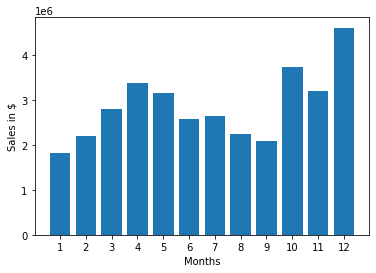

In [15]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,sales['Sales'])
plt.xlabel("Months")
plt.ylabel("Sales in $")
plt.xticks(months)
plt.show()

In [16]:
data_frame.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [17]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

data_frame['City'] = data_frame['Purchase Address'].apply(lambda x: get_city(x)+"("+get_state(x)+")")
data_frame.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


In [18]:
results = data_frame.groupby("City").sum()
results

,Quantity Ordered,Price Each,Months,Sales
City,,,,
Atlanta(GA),16602,2.779908e+06,104794,2.795499e+06
Austin(TX),11153,1.809874e+06,69829,1.819582e+06
Boston(MA),22528,3.637410e+06,141112,3.661642e+06
Dallas(TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles(CA),33289,5.421435e+06,208325,5.452571e+06
New York City(NY),27932,4.635371e+06,175741,4.664317e+06
Portland(ME),2750,4.471893e+05,17144,4.497583e+05
Portland(OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco(CA),50239,8.211462e+06,315520,8.262204e+06


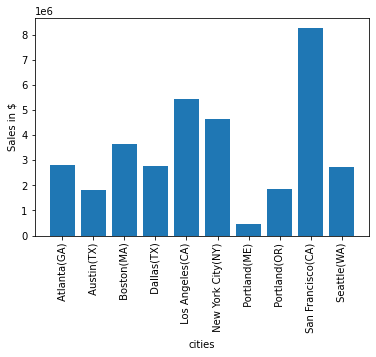

In [19]:
import matplotlib.pyplot as plt
cities = [city for city,r in data_frame.groupby("City")]
plt.bar(cities,results['Sales'])
plt.xlabel("cities")
plt.ylabel("Sales in $")
plt.xticks(cities,rotation='vertical',size=10)
plt.show()

In [20]:
data_frame['Time'] = pd.to_datetime(data_frame['Order Date'])
data_frame.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),2019-04-07 22:30:00
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),2019-04-30 09:27:00


In [21]:
data_frame['Hour'] = data_frame['Time'].dt.hour
data_frame.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Time,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),2019-04-30 09:27:00,9


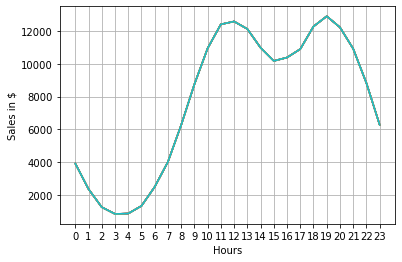

In [22]:
import matplotlib.pyplot as plt
hours = [hour for hour,r in data_frame.groupby("Hour")]
plt.plot(hours,data_frame.groupby("Hour").count())
plt.xlabel("Hours")
plt.ylabel("Sales in $")
plt.grid()
plt.xticks(hours,size=10)
plt.show()

In [23]:
data_frame.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Time,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),2019-04-30 09:27:00,9


In [24]:
dup_df = data_frame[data_frame['Order ID'].duplicated(keep=False)]
dup_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Time,Hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),2019-04-12 14:38:00,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),2019-04-03 19:42:00,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles(CA),2019-04-03 19:42:00,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston(MA),2019-04-07 11:31:00,11


In [25]:
dup_df['Pairs_items'] = dup_df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
dup_df.head(10)

<ipython-input-25-5f5024fa7c7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_df['Pairs_items'] = dup_df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Time,Hour,Pairs_items
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),2019-04-12 14:38:00,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),2019-04-12 14:38:00,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),2019-04-03 19:42:00,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles(CA),2019-04-03 19:42:00,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston(MA),2019-04-07 11:31:00,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston(MA),2019-04-07 11:31:00,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco(CA),2019-04-10 17:00:00,17,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco(CA),2019-04-10 17:00:00,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City(NY),2019-04-12 11:07:00,11,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,11.95,New York City(NY),2019-04-12 11:07:00,11,"Lightning Charging Cable,USB-C Charging Cable"


In [28]:
dup_df = dup_df[['Order ID','Pairs_items']].drop_duplicates()

In [29]:
dup_df.head()

,Order ID,Pairs_items
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [30]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in dup_df['Pairs_items']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

In [40]:
for key,value in count.most_common(20):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

In [45]:
most_sold = data_frame.groupby('Product').sum()
most_sold

,Quantity Ordered,Price Each,Months,Sales,Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


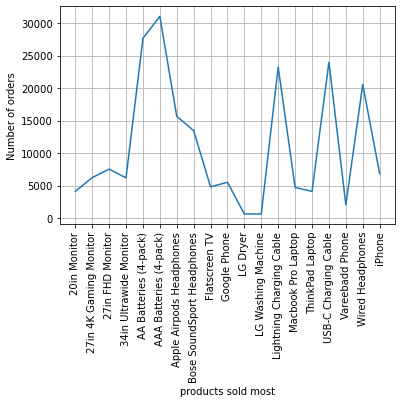

In [47]:
prods = [prod for prod,r in data_frame.groupby("Product")]
plt.plot(prods,most_sold['Quantity Ordered'])
plt.xlabel("products sold most")
plt.ylabel("Number of orders")
plt.grid()
plt.xticks(prods,rotation='vertical',size=10)
plt.show()

In [55]:
prices = data_frame.groupby('Product').mean()['Price Each']

<ipython-input-59-5ed6ba2a7868>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


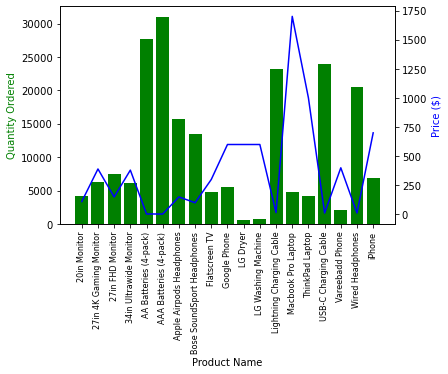

In [59]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(prods,most_sold['Quantity Ordered'] , color='g')
ax2.plot(prods, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(prods, rotation='vertical', size=8)

fig.show()